In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/CG4002/"IMU_25_030423_V"
!ls

Mounted at /content/drive
/content/drive/My Drive/CG4002/IMU_25_030423_V
grenade  idle  logout  reload  shield


In [ ]:
import glob
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
grenade = glob.glob("grenade/*")
idle = glob.glob("idle/*")
logout = glob.glob("logout/*")
reload = glob.glob("reload/*")
shield = glob.glob("shield/*")

In [ ]:
for i, file in enumerate(reload):
  if i == 0:
    df_reload = pd.read_csv(file, header=None, names=["ax", "ay", "az", "gx", "gy", "gz", "time"])
    continue
  df_reload = pd.concat([df_reload, pd.read_csv(file, header=None, names=["ax", "ay", "az", "gx", "gy", "gz", "time"])])
df_reload.drop(['time'], axis=1, inplace=True)
df_reload.reset_index(drop=True, inplace=True)

for i, file in enumerate(shield):
  if i == 0:
    df_shield = pd.read_csv(file, header=None, names=["ax", "ay", "az", "gx", "gy", "gz", "time"])
    continue
  df_shield = pd.concat([df_shield, pd.read_csv(file, header=None, names=["ax", "ay", "az", "gx", "gy", "gz", "time"])])
df_shield.drop(['time'], axis=1, inplace=True)
df_shield.reset_index(drop=True, inplace=True)

for i, file in enumerate(grenade):
  if i == 0:
    df_grenade = pd.read_csv(file, header=None, names=["ax", "ay", "az", "gx", "gy", "gz", "time"])
    continue
  df_grenade = pd.concat([df_grenade, pd.read_csv(file, header=None, names=["ax", "ay", "az", "gx", "gy", "gz", "time"])])
df_grenade.drop(['time'], axis=1, inplace=True)
df_grenade.reset_index(drop=True, inplace=True)

for i, file in enumerate(idle):
  if i == 0:
    df_idle = pd.read_csv(file, header=None, names=["ax", "ay", "az", "gx", "gy", "gz", "time"])
    continue
  df_idle = pd.concat([df_idle, pd.read_csv(file, header=None, names=["ax", "ay", "az", "gx", "gy", "gz", "time"])])
df_idle.drop(['time'], axis=1, inplace=True)
df_idle.reset_index(drop=True, inplace=True)

for i, file in enumerate(logout):
  if i == 0:
    df_logout = pd.read_csv(file, header=None, names=["ax", "ay", "az", "gx", "gy", "gz", "time"])
    continue
  df_logout = pd.concat([df_logout, pd.read_csv(file, header=None, names=["ax", "ay", "az", "gx", "gy", "gz", "time"])])
df_logout.drop(['time'], axis=1, inplace=True)
df_logout.reset_index(drop=True, inplace=True)

In [ ]:
window_size = 35
count = 0
indexes = []
current = []
for i, row in df_grenade.iterrows():
  if row[0] == 200:
    if current and len(current) == window_size:
      indexes.extend(current)
    current = []
    count = 0
  elif count == window_size:
    count = 0
    indexes.extend(current)
    continue
  else:
    count += 1
    current.append(i)
df_grenade = df_grenade.iloc[indexes]
df_grenade

,ax,ay,az,gx,gy,gz
2,-12.57,-2.93,-22.73,234.59,-160.99,37.60
3,-10.43,-3.50,-20.76,146.95,-197.20,230.83
4,-4.96,-5.87,-17.26,4.28,-199.43,-292.83
5,-2.55,-8.90,-15.36,-220.17,-142.10,-218.47
6,-0.43,-17.01,-13.73,258.71,-101.26,-167.29
...,...,...,...,...,...,...
4373,1.47,-8.78,-2.53,-4.21,13.52,5.21
4374,1.80,-9.03,-2.32,-2.18,23.60,13.00
4375,2.03,-8.93,-2.28,4.51,19.10,4.59
4376,1.72,-8.66,-2.53,3.49,3.46,-9.29


In [ ]:
count = 0
indexes = []
current = []
for i, row in df_idle.iterrows():
  if row[0] == 200:
    if current and len(current) == window_size:
      indexes.extend(current)
    current = []
    count = 0
  elif count == window_size:
    count = 0
    indexes.extend(current)
    continue
  else:
    count += 1
    current.append(i)
df_idle = df_idle.iloc[indexes]
df_idle

,ax,ay,az,gx,gy,gz
5,3.41,-12.24,-1.10,-99.25,2.57,-133.55
6,2.44,-12.31,-1.15,-96.04,15.51,-146.81
7,1.27,-12.56,-1.35,-93.36,16.49,-153.74
8,0.78,-12.52,-1.14,-86.08,13.44,-151.30
9,0.05,-11.71,-1.30,-72.71,3.73,-148.44
...,...,...,...,...,...,...
2657,0.98,-8.67,-0.24,9.00,-143.68,26.93
2658,1.49,-8.94,-0.33,13.90,-170.49,36.12
2659,2.05,-8.97,-0.63,18.25,-151.05,44.26
2660,2.33,-9.14,-0.79,11.99,-140.66,46.69


In [ ]:
count = 0
indexes = []
current = []
for i, row in df_logout.iterrows():
  if row[0] == 200:
    if current and len(current) == window_size:
      indexes.extend(current)
    current = []
    count = 0
  elif count == window_size:
    count = 0
    indexes.extend(current)
    continue
  else:
    count += 1
    current.append(i)
df_logout = df_logout.iloc[indexes]
df_logout

,ax,ay,az,gx,gy,gz
5,-1.74,-14.99,-6.56,-289.17,-173.78,26.12
6,-0.38,-10.51,-8.04,-322.09,-169.81,17.61
7,1.06,-4.84,-9.46,289.92,-185.16,0.91
8,1.59,-0.22,-10.06,236.98,-223.29,-32.24
9,2.43,3.48,-9.84,94.74,-148.95,-28.00
...,...,...,...,...,...,...
3891,-0.16,-8.37,-4.06,0.44,1.09,-0.61
3892,-0.05,-8.41,-3.98,1.26,-1.08,-0.94
3893,-0.12,-8.23,-4.13,0.51,-0.77,-1.51
3894,-0.13,-8.25,-4.12,-2.13,-2.74,-1.34


In [ ]:
count = 0
indexes = []
current = []
for i, row in df_reload.iterrows():
  if row[0] == 200:
    if current and len(current) == window_size:
      indexes.extend(current)
    current = []
    count = 0
  elif count == window_size:
    count = 0
    indexes.extend(current)
    continue
  else:
    count += 1
    current.append(i)
df_reload = df_reload.iloc[indexes]
df_reload

,ax,ay,az,gx,gy,gz
5,-5.00,5.47,-12.07,149.07,155.33,-246.47
6,-5.03,0.55,-16.37,103.82,287.71,-2.33
7,4.98,-3.44,-18.27,-63.87,155.33,54.15
8,0.99,-14.64,-23.20,-117.16,75.44,-47.24
9,3.59,-8.42,-23.79,-105.26,327.58,43.10
...,...,...,...,...,...,...
3770,-0.59,-8.85,-3.06,1.86,-2.39,-2.07
3771,-0.62,-8.67,-3.07,4.88,12.42,0.22
3772,-0.54,-8.73,-3.26,5.63,13.18,2.57
3773,-0.59,-8.55,-3.15,2.63,15.07,0.47


In [ ]:
count = 0
indexes = []
current = []
for i, row in df_shield.iterrows():
  if row[0] == 200:
    if current and len(current) == window_size:
      indexes.extend(current)
    current = []
    count = 0
  elif count == window_size:
    count = 0
    indexes.extend(current)
    continue
  else:
    count += 1
    current.append(i)
df_shield = df_shield.iloc[indexes]
df_shield

,ax,ay,az,gx,gy,gz
5,12.87,-12.34,-10.08,-15.68,290.03,-99.43
6,12.15,-14.81,-11.59,-86.84,303.07,-163.35
7,10.90,-19.87,-11.55,-191.11,268.20,-274.39
8,10.76,-23.76,-11.32,-231.58,177.77,279.63
9,12.25,-24.14,-10.77,-200.33,117.92,219.68
...,...,...,...,...,...,...
3791,2.67,-8.77,-1.41,-0.65,-0.03,0.04
3792,2.55,-8.86,-1.27,-0.07,1.51,-1.72
3793,2.48,-8.72,-1.35,1.12,-1.31,-0.15
3794,2.63,-8.77,-1.39,0.54,-0.38,-1.64


In [ ]:
# # Process out the angle overflow
# field = 'yaw'
# action_length = 60
# for i in range(df_shield.shape[0]//action_length):
#   diff = 0
#   prev = 0
#   for j, value in enumerate(df_shield[field][i*action_length:i*action_length + action_length]):
#     diff = value - prev
#     if diff < -340:
#       df_shield[field][i*action_length + j] = value + 360
#       prev = value + 360
#     else:
#       prev = value

# for i in range(df_reload.shape[0]//action_length):
#   diff = 0
#   prev = 0
#   for j, value in enumerate(df_reload[field][i*action_length:i*action_length + action_length]):
#     diff = value - prev
#     if diff < -340:
#       df_reload[field][i*action_length + j] = value + 360
#       prev = value + 360
#     else:
#       prev = value

# for i in range(df_grenade.shape[0]//action_length):
#   diff = 0
#   prev = 0
#   for j, value in enumerate(df_grenade[field][i*action_length:i*action_length + action_length]):
#     diff = value - prev
#     if diff < -340:
#       df_grenade[field][i*action_length + j] = value + 360
#       prev = value + 360
#     else:
#       prev = value

# for i in range(df_logout.shape[0]//action_length):
#   diff = 0
#   prev = 0
#   for j, value in enumerate(df_logout[field][i*action_length:i*action_length + action_length]):
#     diff = value - prev
#     if diff < -340:
#       df_logout[field][i*action_length + j] = value + 360
#       prev = value + 360
#     else:
#       prev = value

# for i in range(df_idle.shape[0]//action_length):
#   diff = 0
#   prev = 0
#   for j, value in enumerate(df_idle[field][i*action_length:i*action_length + action_length]):
#     diff = value - prev
#     if diff < -340:
#       df_idle[field][i*action_length + j] = value + 360
#       prev = value + 360
#     else:
#       prev = value

In [ ]:
# # Process out the angle overflow
# field = 'pitch'
# for i in range(df_shield.shape[0]//action_length):
#   diff = 0
#   prev = 0
#   for j, value in enumerate(df_shield[field][i*action_length:i*action_length + action_length]):
#     diff = value - prev
#     if diff < -340:
#       df_shield[field][i*action_length + j] = value + 360
#       prev = value + 360
#     else:
#       prev = value

# for i in range(df_reload.shape[0]//action_length):
#   diff = 0
#   prev = 0
#   for j, value in enumerate(df_reload[field][i*action_length:i*action_length + action_length]):
#     diff = value - prev
#     if diff < -340:
#       df_reload[field][i*action_length + j] = value + 360
#       prev = value + 360
#     else:
#       prev = value

# for i in range(df_grenade.shape[0]//action_length):
#   diff = 0
#   prev = 0
#   for j, value in enumerate(df_grenade[field][i*action_length:i*action_length + action_length]):
#     diff = value - prev
#     if diff < -340:
#       df_grenade[field][i*action_length + j] = value + 360
#       prev = value + 360
#     else:
#       prev = value

# for i in range(df_logout.shape[0]//action_length):
#   diff = 0
#   prev = 0
#   for j, value in enumerate(df_logout[field][i*action_length:i*action_length + action_length]):
#     diff = value - prev
#     if diff < -340:
#       df_logout[field][i*action_length + j] = value + 360
#       prev = value + 360
#     else:
#       prev = value

# for i in range(df_idle.shape[0]//action_length):
#   diff = 0
#   prev = 0
#   for j, value in enumerate(df_idle[field][i*action_length:i*action_length + action_length]):
#     diff = value - prev
#     if diff < -340:
#       df_idle[field][i*action_length + j] = value + 360
#       prev = value + 360
#     else:
#       prev = value

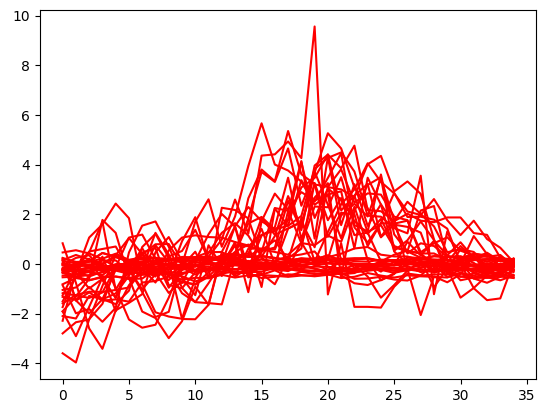

In [ ]:
field = 'ax'
action_length=35
for i in range(40):
  # plt.plot(np.arange(0, action_length), df_reload[field][i*action_length:i*action_length + action_length], c = 'blue')
  plt.plot(np.arange(0, action_length), df_logout[field][i*action_length:i*action_length + action_length], c = 'red')

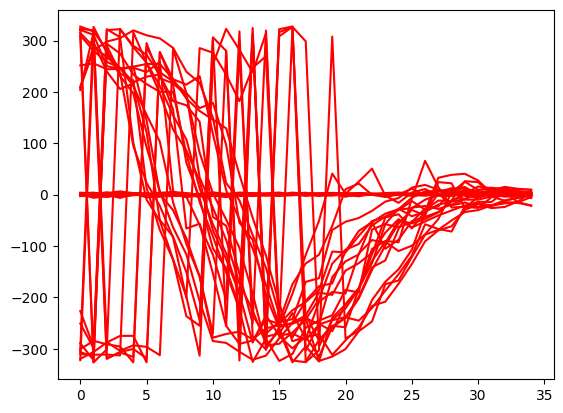

In [ ]:
field = 'gx'
for i in range(40):
  # plt.plot(np.arange(0, action_length), df_reload[field][i*action_length:i*action_length + action_length], c = 'blue')
  plt.plot(np.arange(0, action_length), df_logout[field][i*action_length:i*action_length + action_length], c = 'red')

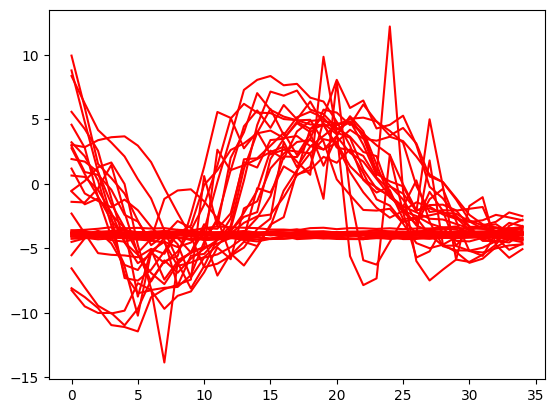

In [ ]:
field = 'az'
for i in range(40):
  # plt.plot(np.arange(0, action_length), df_logout[field][i*action_length:i*action_length + action_length], c = 'blue')
  plt.plot(np.arange(0, action_length), df_logout[field][i*action_length:i*action_length + action_length], c = 'red')

In [ ]:
classes = ["grenade", "idle", "logout", "reload", "shield"]
classes_dict = {"grenade": df_grenade, "idle": df_idle, "logout": df_logout, "reload": df_reload, "shield": df_shield}
for i, c in enumerate(classes):
  df_new = classes_dict[c]
  df_new['action'] = c
  if i == 0:
    df_combined = df_new
    continue
  df_combined = pd.concat([df_combined, df_new])
df_combined.reset_index(drop=True, inplace=True)

In [ ]:
df_combined

,ax,ay,az,gx,gy,gz,action
0,-12.57,-2.93,-22.73,234.59,-160.99,37.60,grenade
1,-10.43,-3.50,-20.76,146.95,-197.20,230.83,grenade
2,-4.96,-5.87,-17.26,4.28,-199.43,-292.83,grenade
3,-2.55,-8.90,-15.36,-220.17,-142.10,-218.47,grenade
4,-0.43,-17.01,-13.73,258.71,-101.26,-167.29,grenade
...,...,...,...,...,...,...,...
14065,2.67,-8.77,-1.41,-0.65,-0.03,0.04,shield
14066,2.55,-8.86,-1.27,-0.07,1.51,-1.72,shield
14067,2.48,-8.72,-1.35,1.12,-1.31,-0.15,shield
14068,2.63,-8.77,-1.39,0.54,-0.38,-1.64,shield


In [ ]:
threshold = 10
differences = []
indexes = []
index = []
difference = 0
prev = 0
for i, row in df_combined.iterrows():
  if i == 0:
    prev = row['az']
    index.append(i)
    continue

  if i % 35 == 0:
    if difference > threshold:
      indexes.extend(index)
    differences.append(difference)
    index = []
    index.append(i)
    prev = row['az']
    difference = 0
  else:
    index.append(i)
    difference += abs(row['az'] - prev)
    prev = row['az']

differences.append(difference)
if difference > threshold:
  indexes.extend(index)

In [ ]:
sum(differences)/len(differences)

43.67012437810948

(array([185.,  44.,   5.,  13.,  27.,  21.,  16.,   8.,   4.,   4.,   2.,
          6.,   6.,  10.,   9.,   9.,   9.,   7.,   2.,   5.,   3.,   0.,
          4.,   1.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([  1.53      ,  10.76533333,  20.00066667,  29.236     ,
         38.47133333,  47.70666667,  56.942     ,  66.17733333,
         75.41266667,  84.648     ,  93.88333333, 103.11866667,
        112.354     , 121.58933333, 130.82466667, 140.06      ,
        149.29533333, 158.53066667, 167.766     , 177.00133333,
        186.23666667, 195.472     , 204.70733333, 213.94266667,
        223.178     , 232.41333333, 241.64866667, 250.884     ,
        260.11933333, 269.35466667, 278.59      ]),
 <BarContainer object of 30 artists>)

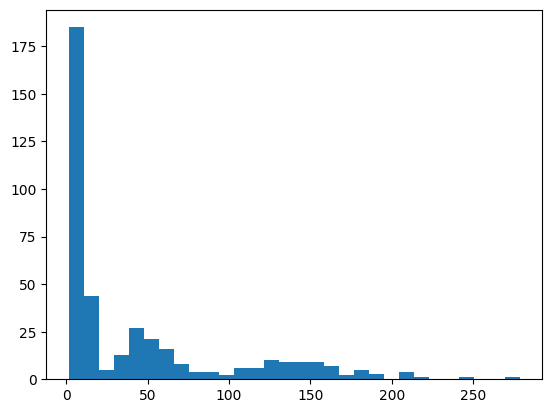

In [ ]:
plt.hist(differences, bins=30)

In [ ]:
len(indexes)

7735

In [ ]:
df_combined_filtered = df_combined.iloc[indexes]
df_combined_filtered
df_combined_filtered.reset_index(drop=True, inplace=True)
df_combined_filtered

,ax,ay,az,gx,gy,gz,action
0,-12.57,-2.93,-22.73,234.59,-160.99,37.60,grenade
1,-10.43,-3.50,-20.76,146.95,-197.20,230.83,grenade
2,-4.96,-5.87,-17.26,4.28,-199.43,-292.83,grenade
3,-2.55,-8.90,-15.36,-220.17,-142.10,-218.47,grenade
4,-0.43,-17.01,-13.73,258.71,-101.26,-167.29,grenade
...,...,...,...,...,...,...,...
7730,11.42,-14.78,-3.97,90.40,-127.95,226.09,shield
7731,11.24,-13.51,-3.90,67.78,-158.71,162.90,shield
7732,11.53,-11.28,-3.42,73.29,-152.18,124.76,shield
7733,9.92,-8.63,-3.55,46.52,-132.77,76.11,shield


In [ ]:
df_combined_filtered['action'].value_counts()

idle       1820
grenade    1540
reload     1470
shield     1470
logout     1435
Name: action, dtype: int64

In [ ]:
df_combined_filtered.to_csv("combined_data_vi.csv")